Seaborn 學習筆記

[datacamp](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)<BR>
[Data Visualization Using Seaborn](https://www.codementor.io/@wajihaurooj/python-seaborn-tutorial-data-visualization-using-seaborn-wpj9qydr2)<br>
[Data Visualization using Matplotlib and Seaborn](https://acadgild.com/blog/data-visualization-using-matplotlib-and-seaborn)<br>
[Python Seaborn Tutorial(Shubham)](https://www.journaldev.com/18583/python-seaborn-tutorial)<br>
[Seaborn Heatmap Tutorial](https://likegeeks.com/seaborn-heatmap-tutorial/)<br>
Data Visualization with Seaborn [Part 1|](https://jovianlin.io/data-visualization-seaborn-part-1/)[Part 2|](https://jovianlin.io/data-visualization-seaborn-part-2/)[Part 3](https://jovianlin.io/data-visualization-seaborn-part-3/)<br>
[Official seaborn tutorial](https://seaborn.pydata.org/tutorial.html)<br>
[The Ultimate Python Seaborn Tutorial](https://elitedatascience.com/python-seaborn-tutorial)<br>
[Seaborn Tutorial for Beginners (Kaggle)](https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners)<br>
[Comprehensive Guide to Seaborn in Python](https://www.analyticsvidhya.com/blog/2019/09/comprehensive-data-visualization-guide-seaborn-python/)<br>
    [Python可視化神器Seaborn入門系列](https://zhuanlan.zhihu.com/p/34354510)

## seaborn 

對於資料的解讀，一張圖勝過千言萬語，資料視覺化可以找出資料的模式、抓住一些重要且複雜的概念，並能凸顯出某一個重要的資料組成。使用Python來進行資料視覺化，最常用的繪圖工具是Matplotlib，它是一個二維的繪圖套件，提供基礎的繪圖能力。此外，seaborn是另一個專門用於繪製統計圖形的高階介面套件。

## 安裝 seaborn

**`conda install -c anaconda seaborn`**

In [1]:
#繪圖環境設定

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [4]:
# Read dataset
df = pd.read_csv('data\Pokemon.csv', index_col=0)
#The argument  index_col=0 simply means we'll treat the first column of the dataset as the ID column
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


## scatter plot

`lmplot() `

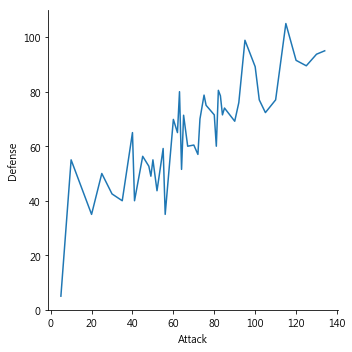

In [6]:
#sns.lmplot(x='Attack', y='Defense', data=df)
sns.relplot(x='Attack', y='Defense', kind="line",ci=None, data=df)

x, y指定資料點的x, y座標，x, y可以由資料集(data)定義

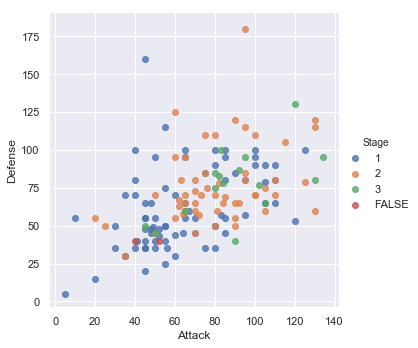

In [90]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

* `fit_reg` 定義是否需要線性回歸功能(=False 不需要)
* `hue` 定義資料點顏色定義依據

(0, 142.0200544906389)

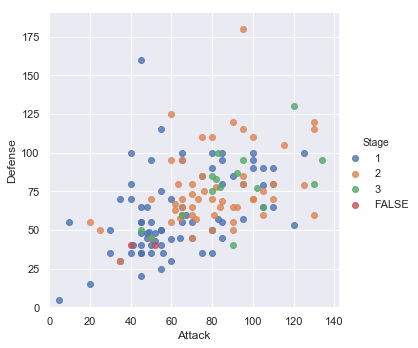

In [91]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

plt.xlim(), plt.ylim() 設定x, y軸資料值的顯示範圍

## Boxplot

箱線圖（Boxplot）也稱箱須圖（Box-whisker Plot），是利用數據中的五個統計量：最小值、第一四分位數、中位數、第三四分位數與最大值來描述數據的一種方法，它也可以粗略地看出數據是否具有有對稱性，分佈的分散程度等信息

![](pic/boxplot.jpg)

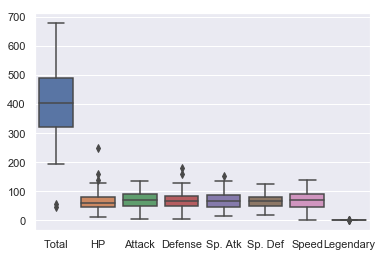

In [93]:
# Boxplot
sns.boxplot(data=df) # seaborn boxplot直接與資料集的欄位資 料連結

## Violinplot plot

violinplot與boxplot扮演類似的角色，它顯示了定量數據在一個（或多個）分類變量的多個層次上的分佈，小提琴繪圖以基礎分佈的核密度估計為特徵。

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

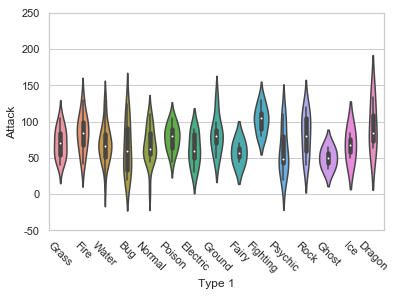

In [104]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)
plt.ylim(-50, 250)
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

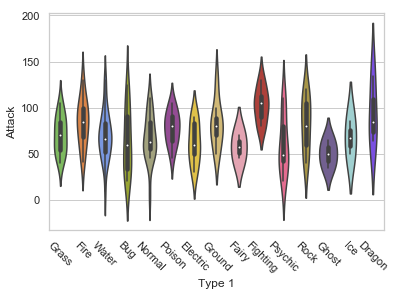

In [103]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette
plt.xticks(rotation=-45)

## swarmplot

Stripplot的本質就是把數據集中具有quantitative屬性的變量按照類別去做散點(Scatterplot)。在很多情況下，stripplot中的點會重疊，使得我們不容易看出點的分佈情況。解決stripplot中點重疊的辦法就是繪製swarmplot,它的本質就是用通過算法，在類別坐標軸的方向上去'延展'繪製這些原本重合的點。

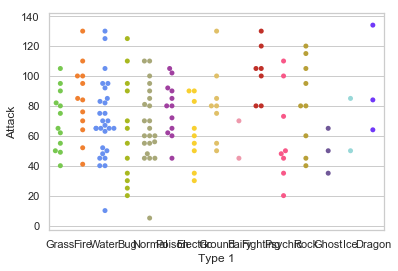

In [98]:
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

## Overlaying plots

Text(0.5, 1.0, 'Attack by Type')

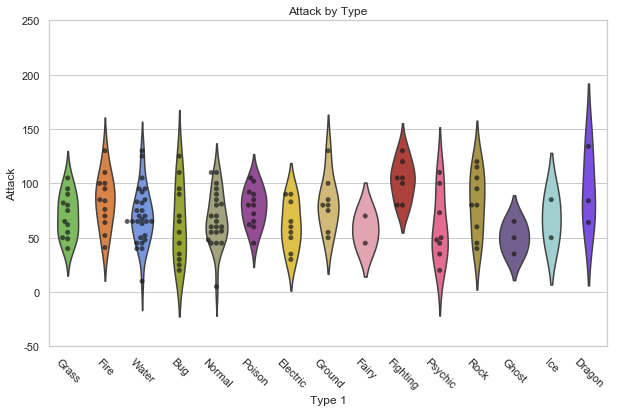

In [105]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
plt.ylim(-50, 250)
plt.xticks(rotation=-45)
# Set title with matplotlib
plt.title('Attack by Type')

## distribution plot

displot()集合了matplotlib的hist()與核函數估計kdeplot的功能，增加了rugplot分佈觀測條顯示與利用scipy庫fit擬合參數分佈的新穎用途。

In [125]:
# Distribution Plot (a.k.a. Histogram)
from scipy.stats import *
sns.distplot(df.Attack, hist=False, fit=norm, color="red")
#sns.kdeplot(df.Attack, cumulative=True)

TypeError: distplot() got an unexpected keyword argument 'shade'

## barplot

在每個類別下面有多少個觀察值，用countplot就可以，相當於是做一個observation counts。Barplot主要是展現在分類中的quantitative變量的平均值情況，並且用了boostrapping算法計算了估計值的置信區間和error bar。

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

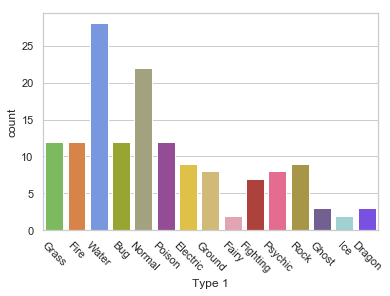

In [102]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

## KDE plot

核密度估計(kernel density estimation)是在概率論中用來估計未知的密度函數，屬於非參數檢驗方法之一。通過核密度估計圖可以比較直觀的看出數據樣本本身的分佈特徵。

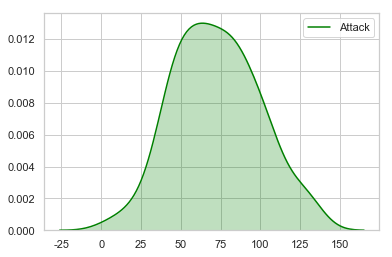

In [130]:
sns.kdeplot(df.Attack, shade=True, color="green")

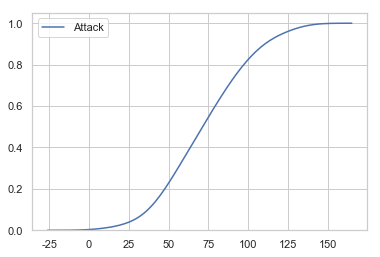

In [129]:
sns.kdeplot(df.Attack,cumulative=True)

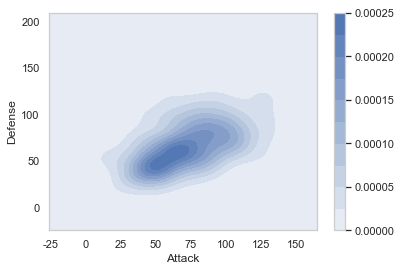

In [127]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense, shade=True, cbar=True)

## joint distribution plot

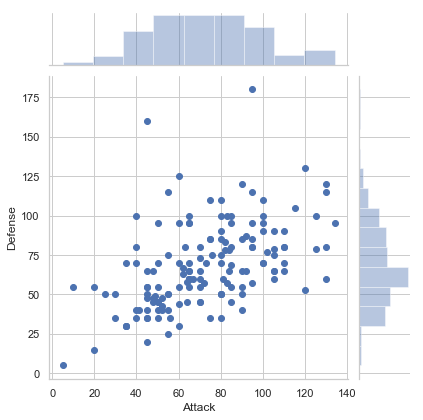

In [107]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)

## heat map

[[0.04798556 0.75260957 0.56883034 0.69857418 0.00818332 0.70369434]
 [0.93829189 0.16873271 0.07419116 0.55297948 0.64330011 0.35491121]
 [0.38249257 0.92892308 0.30975869 0.61876677 0.7070108  0.20025614]
 [0.33816214 0.1303064  0.20768744 0.84151718 0.2236297  0.36589248]]


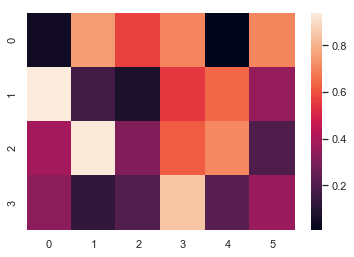

In [110]:
data = np.random.rand(4, 6)
print(data)
sns.heatmap(data)

## 比較matplotlib與seaborn的繪圖風格

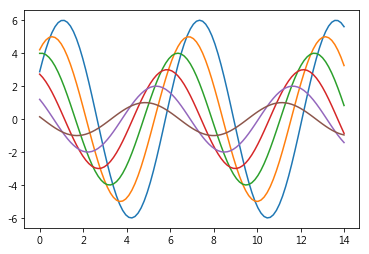

In [2]:
#Matplotlib style plot
x = np.linspace(0, 14, 100)

for i in range(1, 7):
    plt.plot(x, np.sin(x+i*0.5)*(7-i))


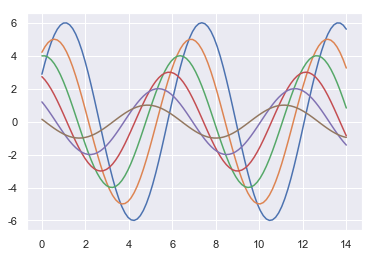

In [79]:
#Seaborn style plot

for i in range(1, 7):
    plt.plot(x, np.sin(x+i*0.5)*(7-i))

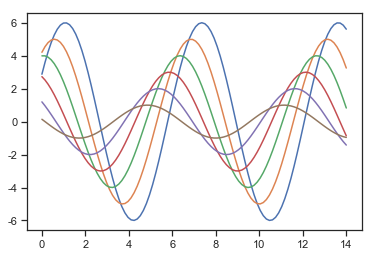

In [22]:
sns.set_style("ticks") # 6 themes: white grid, dark grid, white, dark, ticks
for i in range(1, 7):
    plt.plot(x, np.sin(x+i*0.5)*(7-i))

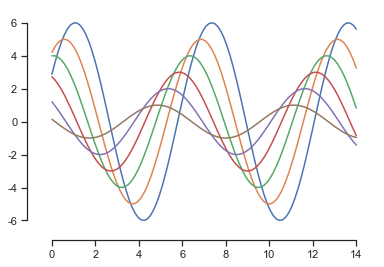

In [29]:
sns.set_style("ticks") # 6 themes: white grid, dark grid, white, dark, ticks

for i in range(1, 7):
    plt.plot(x, np.sin(x+i*0.5)*(7-i))
sns.despine(offset=10, trim=True)

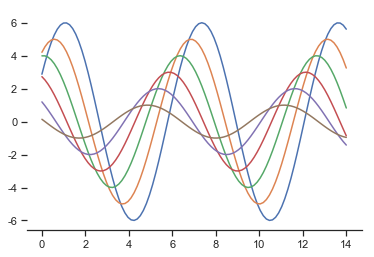

In [33]:
sns.set_style("ticks") # 6 themes: white grid, dark grid, white, dark, ticks

for i in range(1, 7):
    plt.plot(x, np.sin(x+i*0.5)*(7-i))
sns.despine(left=True)

In [34]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

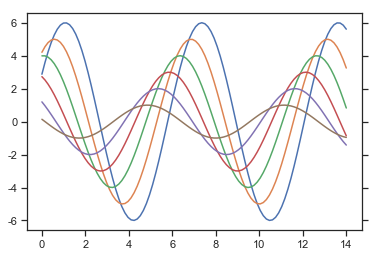

In [71]:
sns.set_style({"axes.facecolor": "white"})
for i in range(1, 7):
    plt.plot(x, np.sin(x+i*0.5)*(7-i))

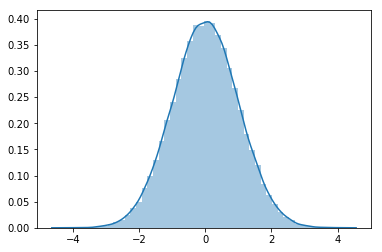

In [2]:
%matplotlib inline

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

normal_samples = np.random.normal(size = 100000) # 生成 100000 組標準常態分配（平均值為 0，標準差為 1 的常態分配）隨機變數
sns.distplot(normal_samples)

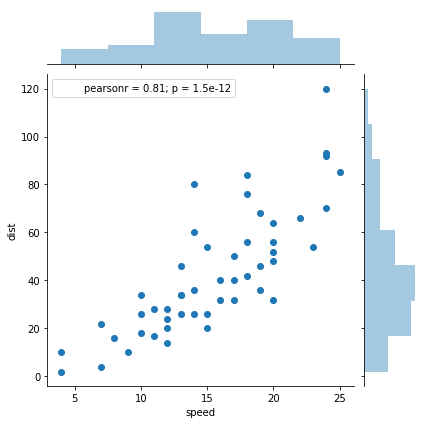

In [3]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

speed = [4, 4, 7, 7, 8, 9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20, 20, 22, 23, 24, 24, 24, 24, 25]
dist = [2, 10, 4, 22, 16, 10, 18, 26, 34, 17, 28, 14, 20, 24, 28, 26, 34, 34, 46, 26, 36, 60, 80, 20, 26, 54, 32, 40, 32, 40, 50, 42, 56, 76, 84, 36, 46, 68, 32, 48, 52, 56, 64, 66, 54, 70, 92, 93, 120, 85]

cars_df = pd.DataFrame(
    {"speed": speed,
     "dist": dist
    }
)

sns.jointplot(x = "speed", y = "dist", data = cars_df)

In [4]:
from bokeh.charts import Histogram, show
import numpy as np

normal_samples = np.random.normal(size = 100000) # 生成 100000 組標準常態分配（平均值為 0，標準差為 1 的常態分配）隨機變數
hist = Histogram(normal_samples)
show(hist)

/Users/CSIEK503/Applications/anaconda/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='0022e79a-0eb6-4b77-b44f-5e4b297b8c91', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='00f75bec-655d-4e4b-9989-2e317f75c2ca', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='01d708af-e2ab-429d-8581-abc374896aa8', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDS

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='418edadb-4614-49c4-b6d6-c1346c2bfbbd', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='41abbcdb-9781-4c22-a6b2-84d7b6625d41', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='42cb3935-9dba-4660-bdaa-8cabd36dc6ae', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='44b3d3e2-1870-4c4e-8b0e-dc78342fd162', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='46836f01-7b96-4de9-90f5-afaecdc76258', ...)
E-1010 (CDSVIEW

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='84e635f6-0f39-42c9-985f-37ac56fddaf9', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='8b819f75-4fa6-4a3c-b910-aecf8476938c', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='8cfd362d-225b-4fd7-9f36-bca77d050c2a', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='8d97e816-5972-432e-a3a5-187022646ff4', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='91d82505-3730-43f3-b162-742ef85c5d62', ...)
E-1010 (CDSVIEW

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='cb80aa43-4a80-4d2c-85eb-b9bd3b04c760', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='cbde808c-4244-4880-a4b0-44bd54495074', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='cd5583f4-55d8-48a9-8204-afd45cdf7ef8', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='cde7e103-6780-496b-be58-af480b030f28', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='d1ecfcf2-3ea3-4aee-b772-e54355bb7c01', ...)
E-1010 (CDSVIEW

In [81]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
print(type(iris.data)) # 資料是儲存為 ndarray
print(iris.feature_names) # 變數名稱可以利用 feature_names 屬性取得
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names) # 轉換為 data frame
iris_df.ix[:, "species"] = iris.target # 將品種加入 data frame
iris_df.head() # 觀察前五個觀測值

<class 'numpy.ndarray'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


C:\Users\jc7qx\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

temperatures = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30])
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84])

lm = LinearRegression()
lm.fit(np.reshape(temperatures, (len(temperatures), 1)), np.reshape(iced_tea_sales, (len(iced_tea_sales), 1)))

# 印出係數
print(lm.coef_)

# 印出截距
print(lm.intercept_ )

[[ 3.73788546]]
[-36.36123348]
